In [43]:
from sklearn.linear_model import LinearRegression  # 선형회귀
from sklearn.preprocessing import PolynomialFeatures # 다항특성을 만들어주는 라이브러리
from sklearn.model_selection import train_test_split
import seaborn as sns
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['axes.unicode_minus'] = False  # 마이너스 표시 해결
# 한글설정
matplotlib.rcParams['font.family'] = 'Malgun Gothic' # windows 사용자
# matplotlib.rcParams['font.family'] = 'AppleGothic Gothic' # Mac사용자
matplotlib.rcParams['font.size'] = '10' # 글자크기

##### 데이터 피처 설명
- pclass : Passenger Class, 승객 등급
- survived : 생존 여부 : target 값이 됨.
- name : 승객 이름
- sex : 승객 성별
- age : 승객 나이
- sibsp : 탑승 한 형제/배우자 수
- parch : 탑승 한 부모/자녀 수
- ticket : 티켓 번호
- fare : 승객 지불 요금
- cabin : 선실 이름
- embarked : 승선항 (C = 쉘 부르그, Q = 퀸즈타운, S = 사우스 햄튼)
- body : 사망자 확인 번호 - 분석과정에서 제외해야 함. 머신러닝에 100% 영향을 미침.
- home.dest : 고향/목적지

In [44]:
df_train = pd.read_csv('titanic_train.csv')
df_train.head(2)
df_test = pd.read_csv('titanic_test.csv')
df_test.head(2)

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,body,home.dest
0,3,0,"Rekic, Mr. Tido",male,38.0,0,0,349249,7.8958,NaN,S,NaN,NaN
1,2,1,"Phillips, Miss. Alice Frances Louisa",female,21.0,0,1,S.O./P.P. 2,21.0000,NaN,S,NaN,"Ilfracombe, Devon"


데이터 확인

In [45]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 916 entries, 0 to 915
Data columns (total 13 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pclass     916 non-null    int64  
 1   survived   916 non-null    int64  
 2   name       916 non-null    object 
 3   sex        916 non-null    object 
 4   age        741 non-null    float64
 5   sibsp      916 non-null    int64  
 6   parch      916 non-null    int64  
 7   ticket     916 non-null    object 
 8   fare       916 non-null    float64
 9   cabin      214 non-null    object 
 10  embarked   914 non-null    object 
 11  body       85 non-null     float64
 12  home.dest  527 non-null    object 
dtypes: float64(3), int64(4), object(6)
memory usage: 93.2+ KB


In [46]:
df_train.describe()

,pclass,survived,age,sibsp,parch,fare,body
count,916.000000,916.000000,741.000000,916.000000,916.000000,916.000000,85.000000
mean,2.292576,0.385371,30.231444,0.532751,0.371179,32.532050,157.870588
std,0.842576,0.486949,13.934240,1.125957,0.837508,47.416524,98.257653
min,1.000000,0.000000,0.170000,0.000000,0.000000,0.000000,1.000000
25%,1.000000,0.000000,21.000000,0.000000,0.000000,7.895800,68.000000
50%,3.000000,0.000000,28.000000,0.000000,0.000000,14.454200,148.000000
75%,3.000000,1.000000,39.000000,1.000000,0.000000,31.275000,249.000000
max,3.000000,1.000000,74.000000,8.000000,9.000000,512.329200,328.000000


In [47]:
df_train.columns

Index(['pclass', 'survived', 'name', 'sex', 'age', 'sibsp', 'parch', 'ticket',
       'fare', 'cabin', 'embarked', 'body', 'home.dest'],
      dtype='object')

In [48]:
# 데이터 중에 name,ticket,cabin,body,home.dest
df_train = df_train.drop(['name','ticket','cabin','body','home.dest'],axis=1)
df_train


,pclass,survived,sex,age,sibsp,parch,fare,embarked
0,2,1,female,13.00,0,1,19.5000,S
1,2,1,female,4.00,1,1,23.0000,S
2,2,1,female,30.00,1,0,13.8583,C
3,3,0,male,NaN,0,0,7.7250,Q
4,3,1,female,22.00,0,0,7.7250,Q
...,...,...,...,...,...,...,...,...
911,3,1,female,0.17,1,2,20.5750,S
912,3,0,male,NaN,0,0,8.0500,S
913,3,1,female,NaN,0,0,7.7333,Q
914,2,1,female,20.00,0,0,36.7500,S


In [49]:
df_test = df_test[['pclass','survived','sex', 'age', 'sibsp', 'parch','fare','embarked']]
df_test

,pclass,survived,sex,age,sibsp,parch,fare,embarked
0,3,0,male,38.0,0,0,7.8958,S
1,2,1,female,21.0,0,1,21.0000,S
2,2,0,male,42.0,1,0,27.0000,S
3,3,0,male,NaN,0,0,14.5000,S
4,2,0,male,25.0,0,0,31.5000,S
...,...,...,...,...,...,...,...,...
388,3,0,male,33.0,0,0,7.8542,S
389,2,1,female,31.0,0,0,21.0000,S
390,3,1,male,NaN,0,0,7.7500,Q
391,3,0,male,NaN,0,0,7.7500,Q


In [50]:
df_train['survived'].value_counts()

survived
0    563
1    353
Name: count, dtype: int64

<Axes: xlabel='survived'>

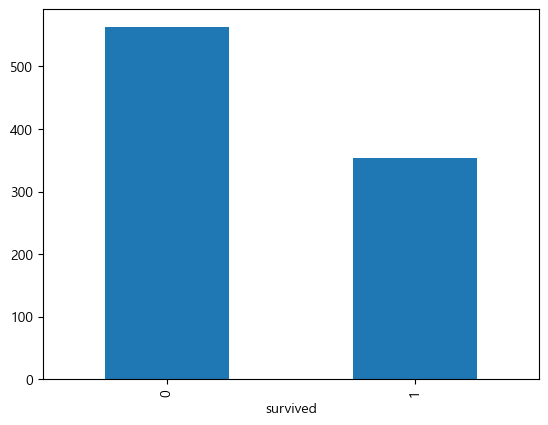

In [51]:
# bar
df_train['survived'].value_counts().plot.bar()

In [52]:
df_train['pclass'].value_counts()

pclass
3    498
1    230
2    188
Name: count, dtype: int64

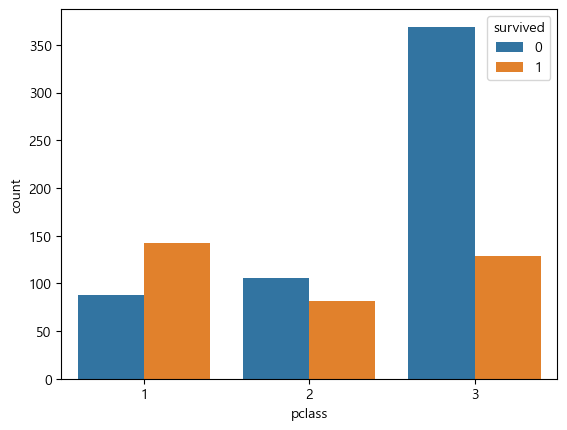

In [53]:
# 피처간의 관련성 부분을 확인
# 생존과 등급의 관계
# pclass : Passenger Class, 승객 등급
import seaborn as sns
df_train['pclass'].value_counts()
# sns.countplot 승객등급별 생존여부 2가지 컬럼을 가지고 그래프 비교
# pclass의 분류로 survived별 데이터 표시
ax = sns.countplot(x='pclass',hue='survived', data = df_train)


In [54]:
# 생존자의 pclass별 인원
df_train[df_train['survived'] == 1]['pclass'].value_counts()

pclass
1    142
3    129
2     82
Name: count, dtype: int64

In [55]:
df_train[df_train['survived'] == 0]['pclass'].value_counts()

pclass
3    369
2    106
1     88
Name: count, dtype: int64

In [60]:
# T-test
from scipy import stats

# 함수생성 - 데이터,컬럼이름
def valid_features(df,col_name): # df_train['age']>0],age - 741, age
    
    # 그래프 출력 
    g = sns.FacetGrid(df, col='survived') # age컬럼 데이터로 분류해서 survived 그래프 출력
    g.map(plt.hist, col_name, bins=30) 
    # 히스토그램 그래프 출력 - x축이 age, y축은 생존자,사망자 명
    
    
    # 생존자데이터
    titanic_survived = df[df['survived']==1]  #생존자데이터 306
    titanic_survived_static = np.array(titanic_survived[col_name]) # 생존자데이터 나의 컬럼
    # 표준편차
    print("data 생존자 std : ",'%.2f'%np.std(titanic_survived_static)) # 생존자데이터의 표준편차 출력
    
    # 사망자데이터
    titanic_n_survived = df[df['survived']==0]  # 사망자 435
    titanic_n_survived_static = np.array(titanic_n_survived[col_name]) # 생존자데이터 나의 컬럼
    # 표준편차
    print("data 사망자 std : ",'%.2f'%np.std(titanic_n_survived_static)) # 생존자데이터의 표준편차 출력
    
    # -------------------
    # T-test로 두집단의 평균 차이를 검정
    # T-test 0.05보다 작거나 큰것을 가지고 판단
    tTestResult = stats.ttest_ind(titanic_survived[col_name],titanic_n_survived[col_name])
    tTestResultDiffVar = stats.ttest_ind(titanic_survived[col_name],titanic_n_survived[col_name],equal_var=False)
    print("p-value assuming equal : %.3f and %.3f" % tTestResult)
    print("p-value not assuming equal : %.3f and %.3f" % tTestResultDiffVar)

data 생존자 std :  14.22
data 사망자 std :  13.71
p-value assuming equal : -0.546 and 0.585
p-value not assuming equal : -0.543 and 0.587


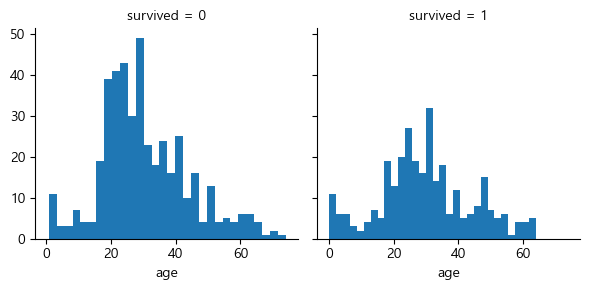

In [61]:
# 나이와 생존의 두 집단의 관계 검정
# df_train[df_train['age']>0] - age값이 들어 있는 전체데이터, age컬럼명
# p-value값이  0.05보다 높아 검정 기각 - 나이와 생존과는 관련성이 없다.
valid_features(df_train[df_train['age']>0],'age')


data 생존자 std :  0.64
data 사망자 std :  1.34
p-value assuming equal : -2.118 and 0.034
p-value not assuming equal : -2.446 and 0.015


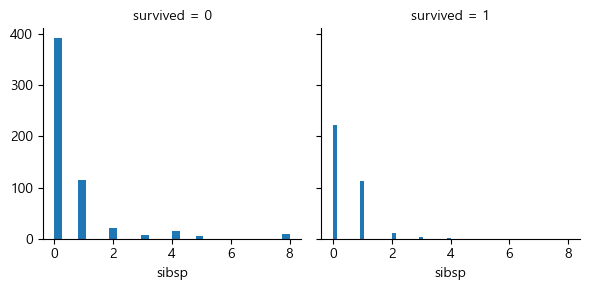

In [63]:
# sibsp 피처
# sibsp : 탑승 한 형제/배우자 수
valid_features(df_train,'sibsp')

데이터 확인

In [64]:
# 성별 확인
df_train['sex'].value_counts()

sex
male      581
female    335
Name: count, dtype: int64

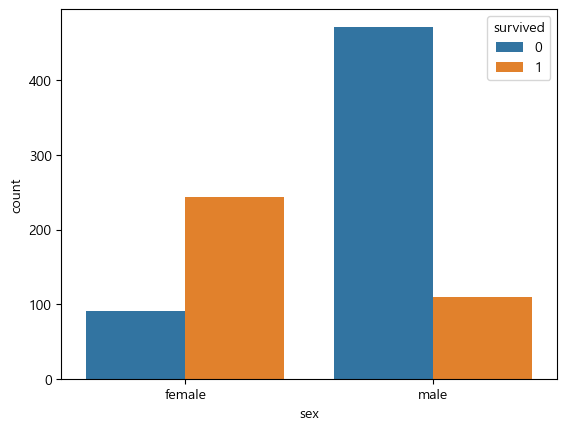

In [65]:
# 두 피처간의 분포 그래프 countplot
ax = sns.countplot(x='sex',hue='survived',data=df_train)

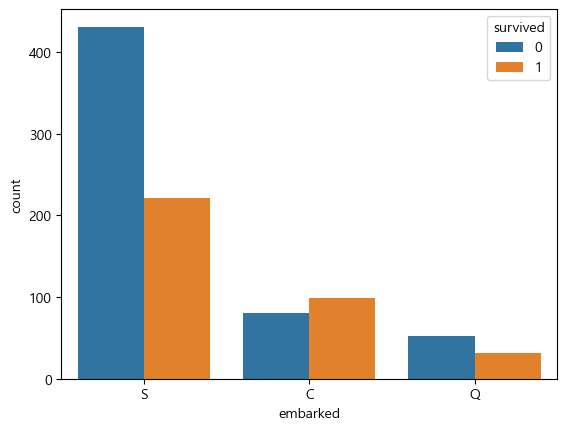

In [67]:
# embarked : 승선항 (C = 쉘 부르그, Q = 퀸즈타운, S = 사우스 햄튼)
df_train['embarked'].value_counts()
ax = sns.countplot(x='embarked', hue='survived',data=df_train)

In [68]:
df_train.columns

Index(['pclass', 'survived', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked'],
      dtype='object')

data 생존자 std :  0.74
data 사망자 std :  0.89
p-value assuming equal : 1.865 and 0.063
p-value not assuming equal : 1.942 and 0.052


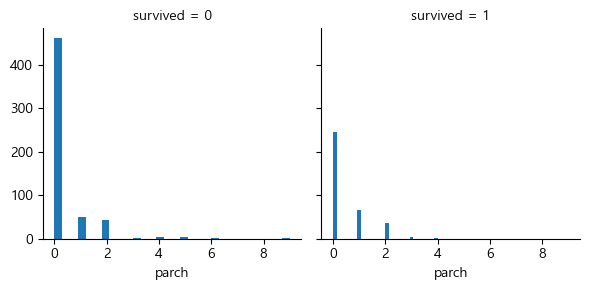

In [69]:
# parch : 탑승 한 부모/자녀 수
valid_features(df_train,'parch')

data 생존자 std :  60.68
data 사망자 std :  33.65
p-value assuming equal : 7.523 and 0.000
p-value not assuming equal : 6.657 and 0.000


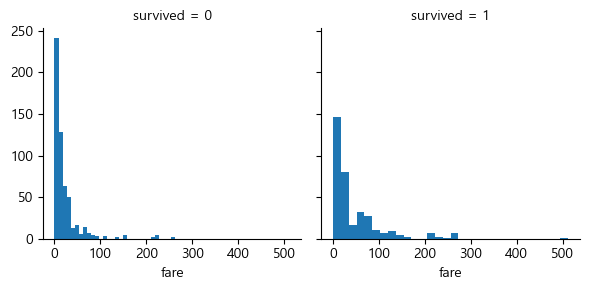

In [70]:
# fare : 승객 지불 요금
valid_features(df_train,'fare')

In [78]:
# nan값을 제외한 age의 평균값
df_train[df_train['age']>0]['age'].mean()

30.23144399460189

In [81]:
# df_test.info()

In [89]:
df_train['embarked'].value_counts().index[0] # C
df_train['embarked'].value_counts().values[0] # 652
df_train['embarked'].value_counts()

embarked
S    652
C    179
Q     83
Name: count, dtype: int64

In [91]:
# 데이터 전처리 - 결측치 
# age 데이터의 평균값으로 nan 데이터를 처리

# 결측치에 넣을 평균값 - train,test세트 모두 적용
replace_mean = df_train[df_train['age']>0]['age'].mean()
df_train['age'] = df_train['age'].fillna(replace_mean)
df_test['age'] = df_test['age'].fillna(replace_mean)

# embark : 결측값 - 데이터 2개
# 데이터중 가장 많이 나온 결과의 값을 대체
embarked_mode = df_train['embarked'].value_counts().index[0]
df_train['embarked'] = df_train['embarked'].fillna(embarked_mode)
df_test['embarked'] = df_test['embarked'].fillna(embarked_mode)


train,test세트

In [93]:
# train,test세트 합치기
whole_df = pd.concat([df_train,df_test])

In [96]:
# 원핫 인코딩을 한후, train,test세트를 분리
train_idx_num = len(df_train)
train_idx_num 

916

In [97]:
# 원핫 인코딩
whole_df_encoded = pd.get_dummies(whole_df)

In [99]:
whole_df_encoded.head()

,pclass,survived,age,sibsp,parch,fare,sex_female,sex_male,embarked_C,embarked_Q,embarked_S
0,2,1,13.000000,0,1,19.5000,True,False,False,False,True
1,2,1,4.000000,1,1,23.0000,True,False,False,False,True
2,2,1,30.000000,1,0,13.8583,True,False,True,False,False
3,3,0,30.231444,0,0,7.7250,False,True,False,True,False
4,3,1,22.000000,0,0,7.7250,True,False,False,True,False


In [105]:
train_idx_num

916

In [106]:
len(whole_df_encoded)

1309

In [118]:
1309-916

393

In [121]:
# train,test 세트 분리
# train : 916
train_input = whole_df_encoded.iloc[:train_idx_num,whole_df_encoded.columns != 'survived']
train_input
train_target = whole_df_encoded['survived'][:train_idx_num]
train_target


# target : 393
test_input = whole_df_encoded.iloc[train_idx_num:,whole_df_encoded.columns != 'survived']
test_input
test_target = whole_df_encoded['survived'][train_idx_num:]
test_target.count()


393

머신러닝

In [122]:
# 표준화 작업
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
ss.fit(train_input)
train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

In [123]:
from sklearn.linear_model import LogisticRegression

# 데이터 훈련시키기
lr = LogisticRegression(random_state=42)
lr.fit(train_input,train_target)

c:\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=42)

In [142]:
predict = lr.predict(test_input)

In [124]:
print(lr.score(train_input,train_target))
print(lr.score(test_input,test_target))

0.787117903930131
0.7964376590330788


confusion_matrix

In [143]:
from sklearn.metrics import confusion_matrix

confmat =confusion_matrix(y_true=test_target,y_pred=predict)

In [144]:
confmat

array([[214,  32],
       [ 48,  99]], dtype=int64)

In [129]:
# 경사하강법
from sklearn.linear_model import SGDClassifier
sc = SGDClassifier(loss='log_loss', max_iter=10,random_state=42)
sc.fit(train_scaled,train_target)

c:\Python312\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:723: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


SGDClassifier(loss='log_loss', max_iter=10, random_state=42)

In [128]:
print(sc.score(train_scaled,train_target))
print(sc.score(test_scaled,test_target))

0.6681222707423581
0.6590330788804071


In [131]:
classes = np.unique(train_target)
classes

array([0, 1], dtype=int64)

In [133]:
train_score = []
test_score = []
for _ in range(0,300):
    sc.partial_fit(train_scaled,train_target,classes=classes)
    train_score.append(sc.score(train_scaled,train_target))
    test_score.append(sc.score(test_scaled,test_target))

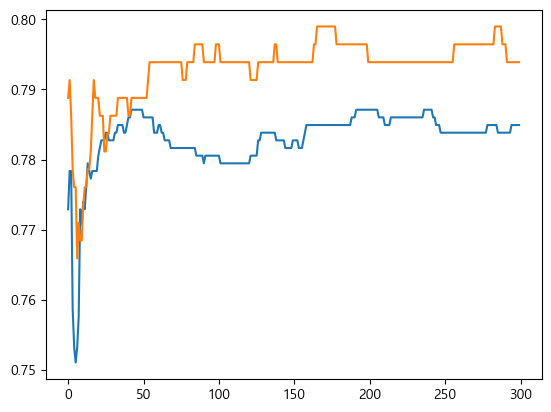

In [134]:
plt.plot(train_score)
plt.plot(test_score)

In [140]:
# 검증세트 - cross_validate
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_validate

splitter = StratifiedKFold(n_splits=10,shuffle=True,random_state=42)
score = cross_validate(lr,train_scaled,train_target,cv=splitter)

In [141]:
np.mean(score['test_score'])

0.7849259436215957

In [147]:
# 랜덤 포레스트 
from sklearn.ensemble import RandomForestClassifier
# n_jobs : core 전부 사용
rf = RandomForestClassifier(max_depth=4, n_jobs=-1,random_state=42)

scores = cross_validate(rf,train_input,train_target,return_train_score=True,n_jobs=-1)
print(np.mean(scores['train_score']),np.mean(scores['test_score']))

0.8247810107425879 0.8067593252554051
